In [2]:
!pip install mediapipe

  Using cached protobuf-4.25.5-cp39-cp39-win_amd64.whl.metadata (541 bytes)
Using cached protobuf-4.25.5-cp39-cp39-win_amd64.whl (413 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.4
    Uninstalling protobuf-4.23.4:
      Successfully uninstalled protobuf-4.23.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.4 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.4 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.23.4 which is incompatible.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.5 which is incompatible.


In [3]:
!pip install opencv-python

In [4]:
!pip install tensorflow

  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl.metadata (540 bytes)
Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.23.4 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.23.4 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.23.4 which is incompatible.
mediapipe 0.10.18 requires protobuf<5,>=4.25.3, but you have protobuf 4.23.4 which is incompatible.


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time

In [6]:
import mediapipe as mp

In [7]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image,results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    

In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
if results.left_hand_landmarks:
    print(len(results.left_hand_landmarks.landmark))
else:
    print("No left hand landmarks detected.")


No left hand landmarks detected.


In [13]:
if results.right_hand_landmarks:
    print(len(results.right_hand_landmarks.landmark))
else:
    print("No right hand landmarks detected.")


21


In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

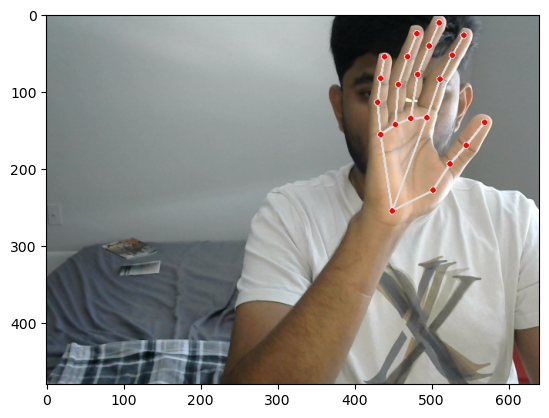

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [17]:
# extract key points
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)


In [18]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
np.save('0',result_test)

In [22]:
np.load('0.npy')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [23]:
result_test

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [24]:
21*3+21*3

126

In [25]:
extract_keypoints(results).shape

(126,)

In [26]:
# path for exported data

DATA_PATH = os.path.join('C:\\Users\\swaro\\Downloads\\SignLanguageDetection-main\\MP_Data\MP')

actions=np.array(['what are you doing','clam dowm','live long and peace',
                  'i love you','all done','go coogs','Thank you','Good job'])
#10 videos worth of data
no_sequences = 10
# 10 frames of length of each frame
sequence_length = 10
# 13*10*10

In [27]:
import os
import numpy as np
import cv2

for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except FileExistsError:
            pass
        for frame_num in range(sequence_length):
            # Simulate frame data (replace with actual frame data)
            frame_data = np.random.rand(50, 50)  # Example placeholder
            npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, frame_data)



In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'what are you doing': 0,
 'clam dowm': 1,
 'live long and peace': 2,
 'i love you': 3,
 'all done': 4,
 'go coogs': 5,
 'Thank you': 6,
 'Good job': 7}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(80, 10, 50, 50)

In [33]:
np.array(labels).shape

(80,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(80, 10, 50, 50)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [39]:
y_test.shape

(16, 8)

In [40]:
y_train.shape

(64, 8)

In [41]:
X_test.shape

(16, 10, 50, 50)

In [42]:
X_train.shape

(64, 10, 50, 50)

In [43]:
from tensorflow.keras.models import Sequential # sequential neural network
from tensorflow.keras.layers import LSTM, Dense 
from tensorflow.keras.callbacks import TensorBoard

In [44]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [45]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(20,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [46]:
X.shape

(80, 10, 50, 50)

In [47]:
[actions.shape[0]]

[8]

In [48]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], -1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], -1)

print("New X_train shape:", X_train.shape)  # Should be (64, 10, 2500)


New X_train shape: (64, 10, 2500)


In [49]:
from sklearn.decomposition import PCA

# Flatten across all samples and frames for PCA
X_train_flat = X_train.reshape(-1, X_train.shape[-1])
X_test_flat = X_test.reshape(-1, X_test.shape[-1])

# Fit PCA and transform
pca = PCA(n_components=126)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Reshape back to (samples, sequence_length, feature_dim)
X_train = X_train_pca.reshape(-1, 10, 126)
X_test = X_test_pca.reshape(-1, 10, 126)

print("After PCA X_train shape:", X_train.shape)  # Should be (64, 10, 126)

After PCA X_train shape: (64, 10, 126)


In [50]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10, 126)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # 8 classes

In [51]:
print("X_train shape:", X_train.shape)  # Should be (samples, 10, 126)
print("y_train shape:", y_train.shape)  # Ensure it matches the number of samples

X_train shape: (64, 10, 126)
y_train shape: (64, 8)


In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=250, callbacks=[tb_callback])

Epoch 1/250


2/2 [==============================] - 2s 19ms/step - loss: 2.0790 - categorical_accuracy: 0.1562
Epoch 2/250
2/2 [==============================] - 0s 13ms/step - loss: 2.0493 - categorical_accuracy: 0.2188
Epoch 3/250
2/2 [==============================] - 0s 12ms/step - loss: 2.0222 - categorical_accuracy: 0.3125
Epoch 4/250
2/2 [==============================] - 0s 11ms/step - loss: 1.9895 - categorical_accuracy: 0.3594
Epoch 5/250
2/2 [==============================] - 0s 18ms/step - loss: 1.9416 - categorical_accuracy: 0.4688
Epoch 6/250
2/2 [==============================] - 0s 20ms/step - loss: 1.8808 - categorical_accuracy: 0.5156
Epoch 7/250
2/2 [==============================] - 0s 24ms/step - loss: 1.7768 - categorical_accuracy: 0.5469
Epoch 8/250
2/2 [==============================] - 0s 17ms/step - loss: 1.6087 - categorical_accuracy: 0.5625
Epoch 9/250
2/2 [==============================] - 0s 12ms/step - loss: 1.3603 - categorical_accuracy: 0.5938
Epoch 10

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 128)               98816     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
Total params: 156488 (611.28 KB)
Trainable params: 156488 (611.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
res = model.predict(X_test)

1/1 [==============================] - 0s 244ms/step


In [56]:
actions[np.argmax(res[2])]

'clam dowm'

In [57]:
actions[np.argmax(y_test[2])]

'i love you'

In [58]:
model.save('action.h5')

c:\Users\swaro\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
ytrue

[4, 1, 3, 2, 6, 1, 5, 4, 5, 3, 1, 2, 6, 6, 1, 3]

In [63]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 9.,  3.],
        [ 4.,  0.]],

       [[14.,  0.],
        [ 2.,  0.]],

       [[13.,  0.],
        [ 3.,  0.]],

       [[ 4., 10.],
        [ 2.,  0.]],

       [[11.,  3.],
        [ 2.,  0.]],

       [[13.,  0.],
        [ 3.,  0.]]])

In [65]:
yhat = model.predict(X_train)

2/2 [==============================] - 0s 5ms/step


In [66]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[54,  0],
        [ 0, 10]],

       [[58,  0],
        [ 0,  6]],

       [[56,  0],
        [ 0,  8]],

       [[57,  0],
        [ 0,  7]],

       [[56,  0],
        [ 0,  8]],

       [[56,  0],
        [ 0,  8]],

       [[57,  0],
        [ 0,  7]],

       [[54,  0],
        [ 0, 10]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

1.0

In [69]:
from scipy import stats

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245),(125,125,125),
         (245,117,16), (117,245,16), (16,117,245),(125,125,125),
          (245,117,16), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [71]:
print("res:", res)


res: [[0.113659   0.13237011 0.11241367 0.0638101  0.17685808 0.20770201
  0.07449827 0.11868872]
 [0.08751662 0.15442556 0.15803012 0.13142832 0.16279288 0.13923728
  0.05684837 0.10972087]
 [0.09055381 0.25692734 0.08644667 0.11559097 0.10279244 0.18158993
  0.0484137  0.11768518]
 [0.08194222 0.13664836 0.14292006 0.15500161 0.18269512 0.11547896
  0.06998245 0.11533123]
 [0.08779931 0.10024831 0.16590811 0.07862943 0.19678643 0.19821489
  0.0818007  0.09061282]
 [0.12578806 0.096098   0.10349987 0.0481629  0.34789518 0.20193526
  0.040336   0.03628469]
 [0.13387065 0.20379828 0.08416951 0.08489179 0.17837901 0.14570343
  0.05073845 0.11844886]
 [0.09919067 0.29563084 0.08404257 0.11975833 0.14898464 0.1305504
  0.02834127 0.09350125]
 [0.08659098 0.12691003 0.15606156 0.10455775 0.19972537 0.16863543
  0.06956342 0.08795545]
 [0.06897994 0.10790851 0.18426782 0.10088114 0.20839581 0.15990457
  0.07862634 0.0910359 ]
 [0.11660779 0.09811696 0.15455376 0.05285513 0.25562012 0.1750102

In [72]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res[:len(actions)]):  # Limit to the size of actions
        prob = float(prob)  # Convert to scalar if necessary
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame

In [73]:
if len(res) != len(actions):
    print(f"Warning: Length mismatch - res: {len(res)}, actions: {len(actions)}")
    res = res[:len(actions)]  # Trim res to match actions

In [74]:
print("Number of actions:", len(actions))
print("Number of colors:", len(colors))


Number of actions: 8
Number of colors: 10


In [75]:
colors = colors[:len(actions)]


In [76]:
res = res.flatten()  # Use this if `res` has more than 1 dimension


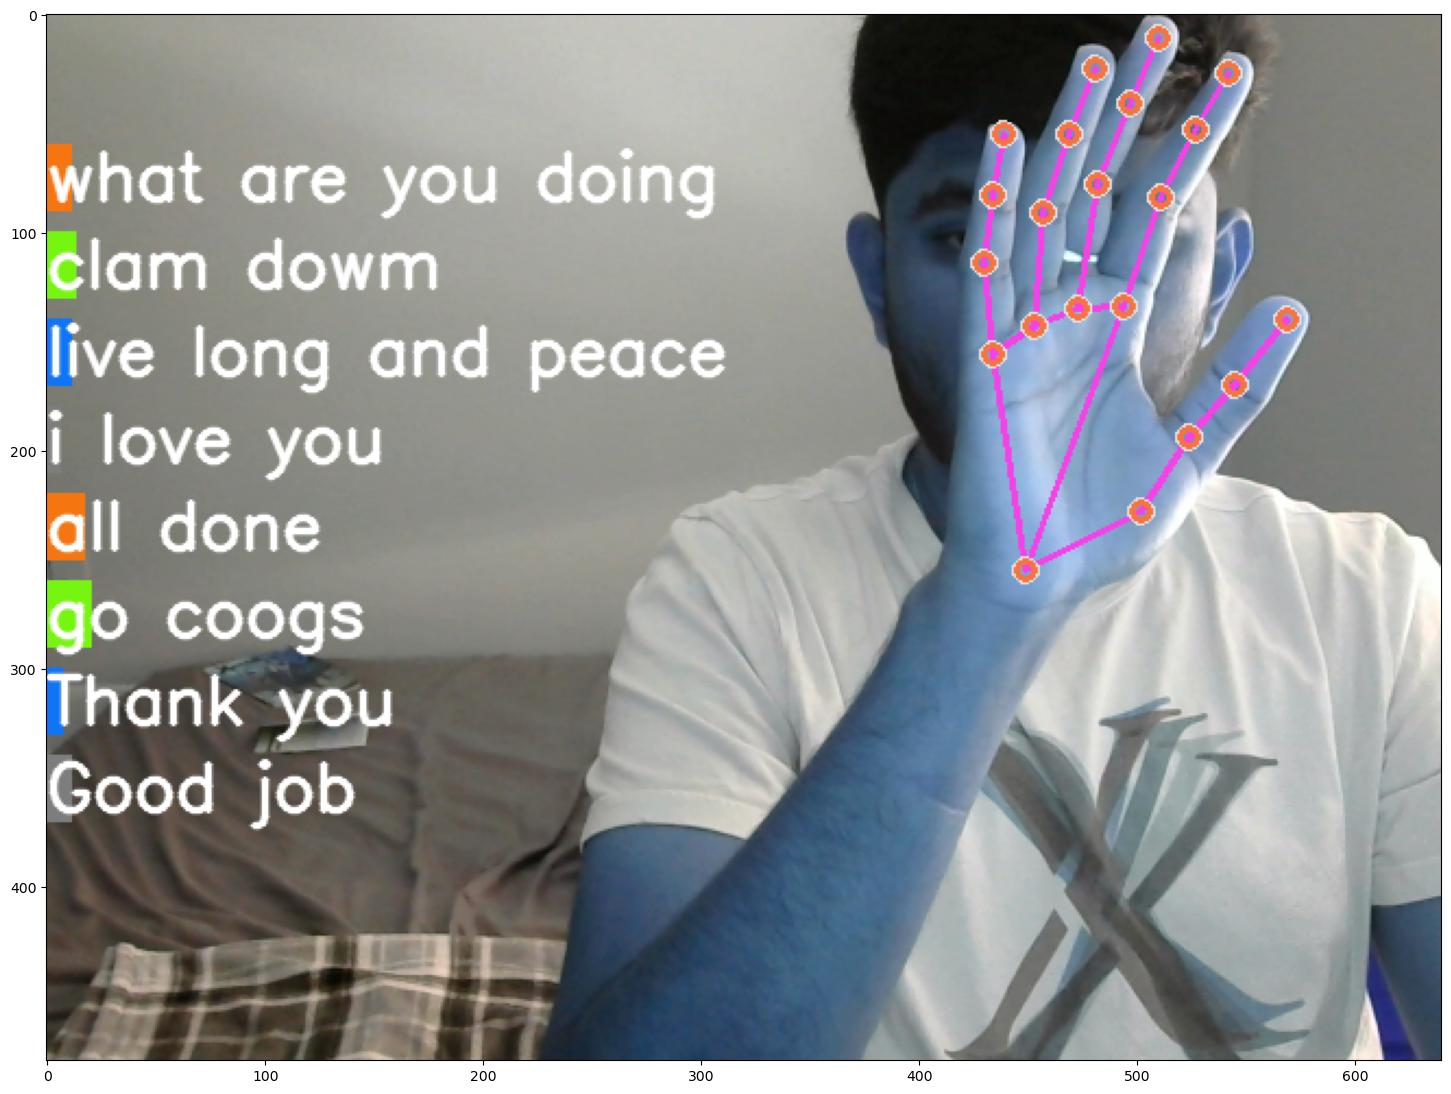

In [77]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [78]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

In [79]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-10:]
        
        if len(sequence) == 10:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
go coogs
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
go coogs
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
go coogs
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
go coogs
<class 'mediapi